In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the energy load data
df = pd.read_excel('/Users/wyattbellinger/College/STAT_413/ERCOT_Price_Prediction_Stat_413_Final_Project/Data/LoadData2023.xlsx')

# Remove ' DST' from 'Hour Ending' column
df['Hour Ending'] = df['Hour Ending'].str.replace(' DST', '', regex=False)

# Custom function to parse 'Hour Ending' column
def parse_hour_ending(s):
    # Ensure the string is stripped of leading/trailing whitespaces
    s = s.strip()
    # Check if time is '24:00'
    if s.endswith('24:00'):
        # Extract the date part
        date_part = s.split(' ')[0]
        # Convert date to datetime object
        date = pd.to_datetime(date_part, format='%m/%d/%Y')
        # Increment date by one day
        date += pd.Timedelta(days=1)
        # Construct new datetime string with '00:00' time
        new_s = date.strftime('%m/%d/%Y') + ' 00:00'
        # Return the datetime object
        return pd.to_datetime(new_s, format='%m/%d/%Y %H:%M')
    else:
        # For other times, parse normally
        return pd.to_datetime(s, format='%m/%d/%Y %H:%M')

# Apply the custom parsing function to 'Hour Ending' column
df['Hour Ending'] = df['Hour Ending'].apply(parse_hour_ending)

# Extract date and hour from 'Hour Ending'
df['Date'] = df['Hour Ending'].dt.date
df['Hour'] = df['Hour Ending'].dt.hour

# Preview the DataFrame
print(df.head())

          Hour Ending        COAST         EAST        FWEST       NORTH  \
0 2023-01-01 01:00:00  8514.637876  1218.506271  5073.526557  917.394049   
1 2023-01-01 02:00:00  8345.632899  1179.885576  5016.774637  906.854582   
2 2023-01-01 03:00:00  8125.706879  1151.144653  5016.303220  894.817013   
3 2023-01-01 04:00:00  7995.083655  1153.306928  5038.003823  891.733538   
4 2023-01-01 05:00:00  7906.920393  1168.779618  4994.502755  896.893843   

         NCENT        SOUTH        SCENT         WEST         ERCOT  \
0  9896.757586  2859.017922  6012.400469  1116.933155  35609.173887   
1  9675.869720  2845.779210  5934.084260  1107.417972  35012.298856   
2  9490.332365  2734.163642  5855.790279  1101.324245  34369.582295   
3  9420.890470  2555.339795  5840.914307  1105.457821  34000.730337   
4  9430.780728  2484.777679  5873.683697  1108.739956  33865.078669   

         Date  Hour  
0  2023-01-01     1  
1  2023-01-01     2  
2  2023-01-01     3  
3  2023-01-01     4  
4  202

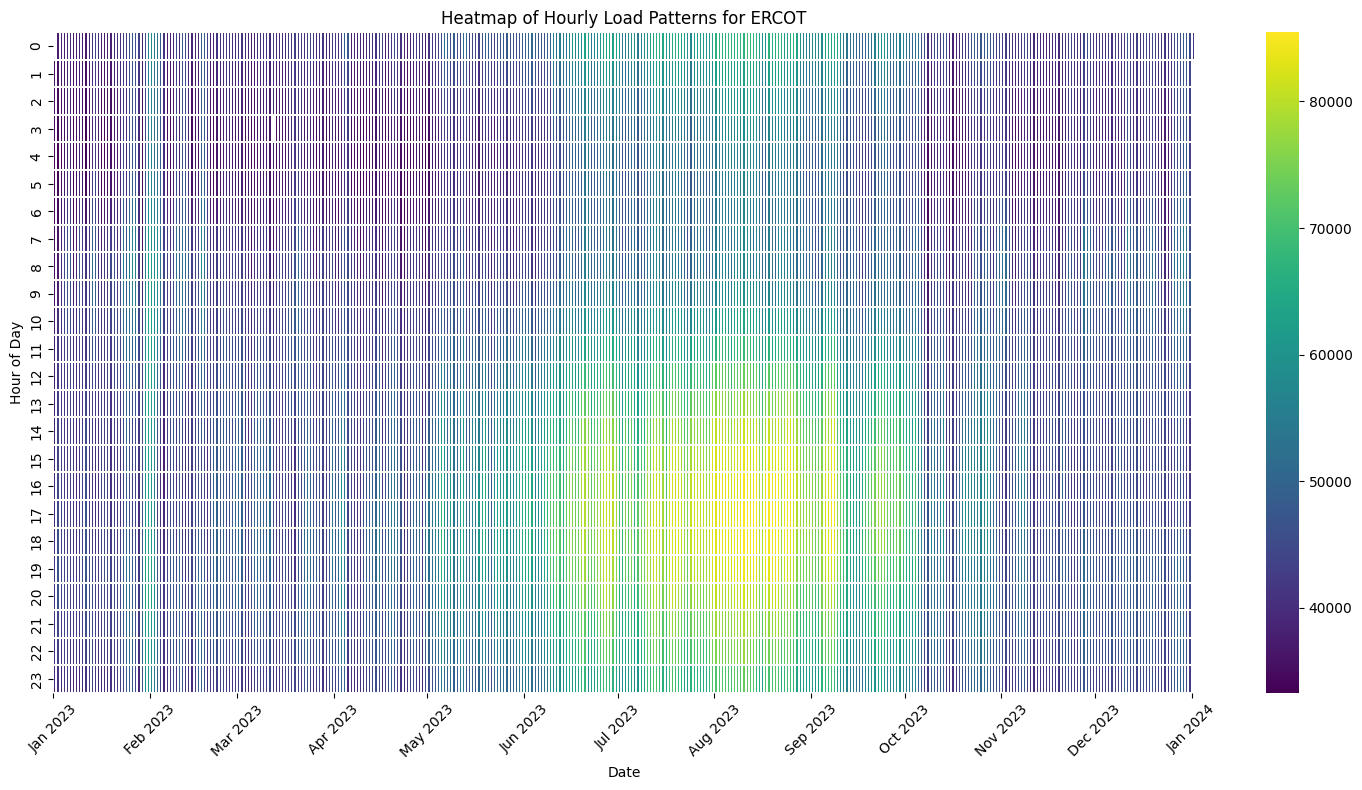

In [14]:
# Proceed to create the pivot table and heatmap
region = 'ERCOT'
pivot_df = df.pivot_table(index='Hour', columns='Date', values=region)
pivot_df = pivot_df.reindex(range(0, 24))  # Adjusted to include hour 0

plt.figure(figsize=(15, 8))

# Extract the dates from the pivot table columns
dates = pd.to_datetime(pivot_df.columns)

# Find positions where the month changes
month_positions = [0] + [i for i in range(1, len(dates)) if dates[i].month != dates[i - 1].month]

# Create labels for these positions
month_labels = [dates[i].strftime('%b %Y') for i in month_positions]

# Plot the heatmap
sns.heatmap(pivot_df, cmap='viridis', linecolor='white', linewidths=0.1)
plt.title(f'Heatmap of Hourly Load Patterns for {region}')
plt.xlabel('Date')
plt.ylabel('Hour of Day')

# Set the x-axis ticks and labels
plt.xticks(month_positions, month_labels, rotation=45)

plt.tight_layout()
plt.show()

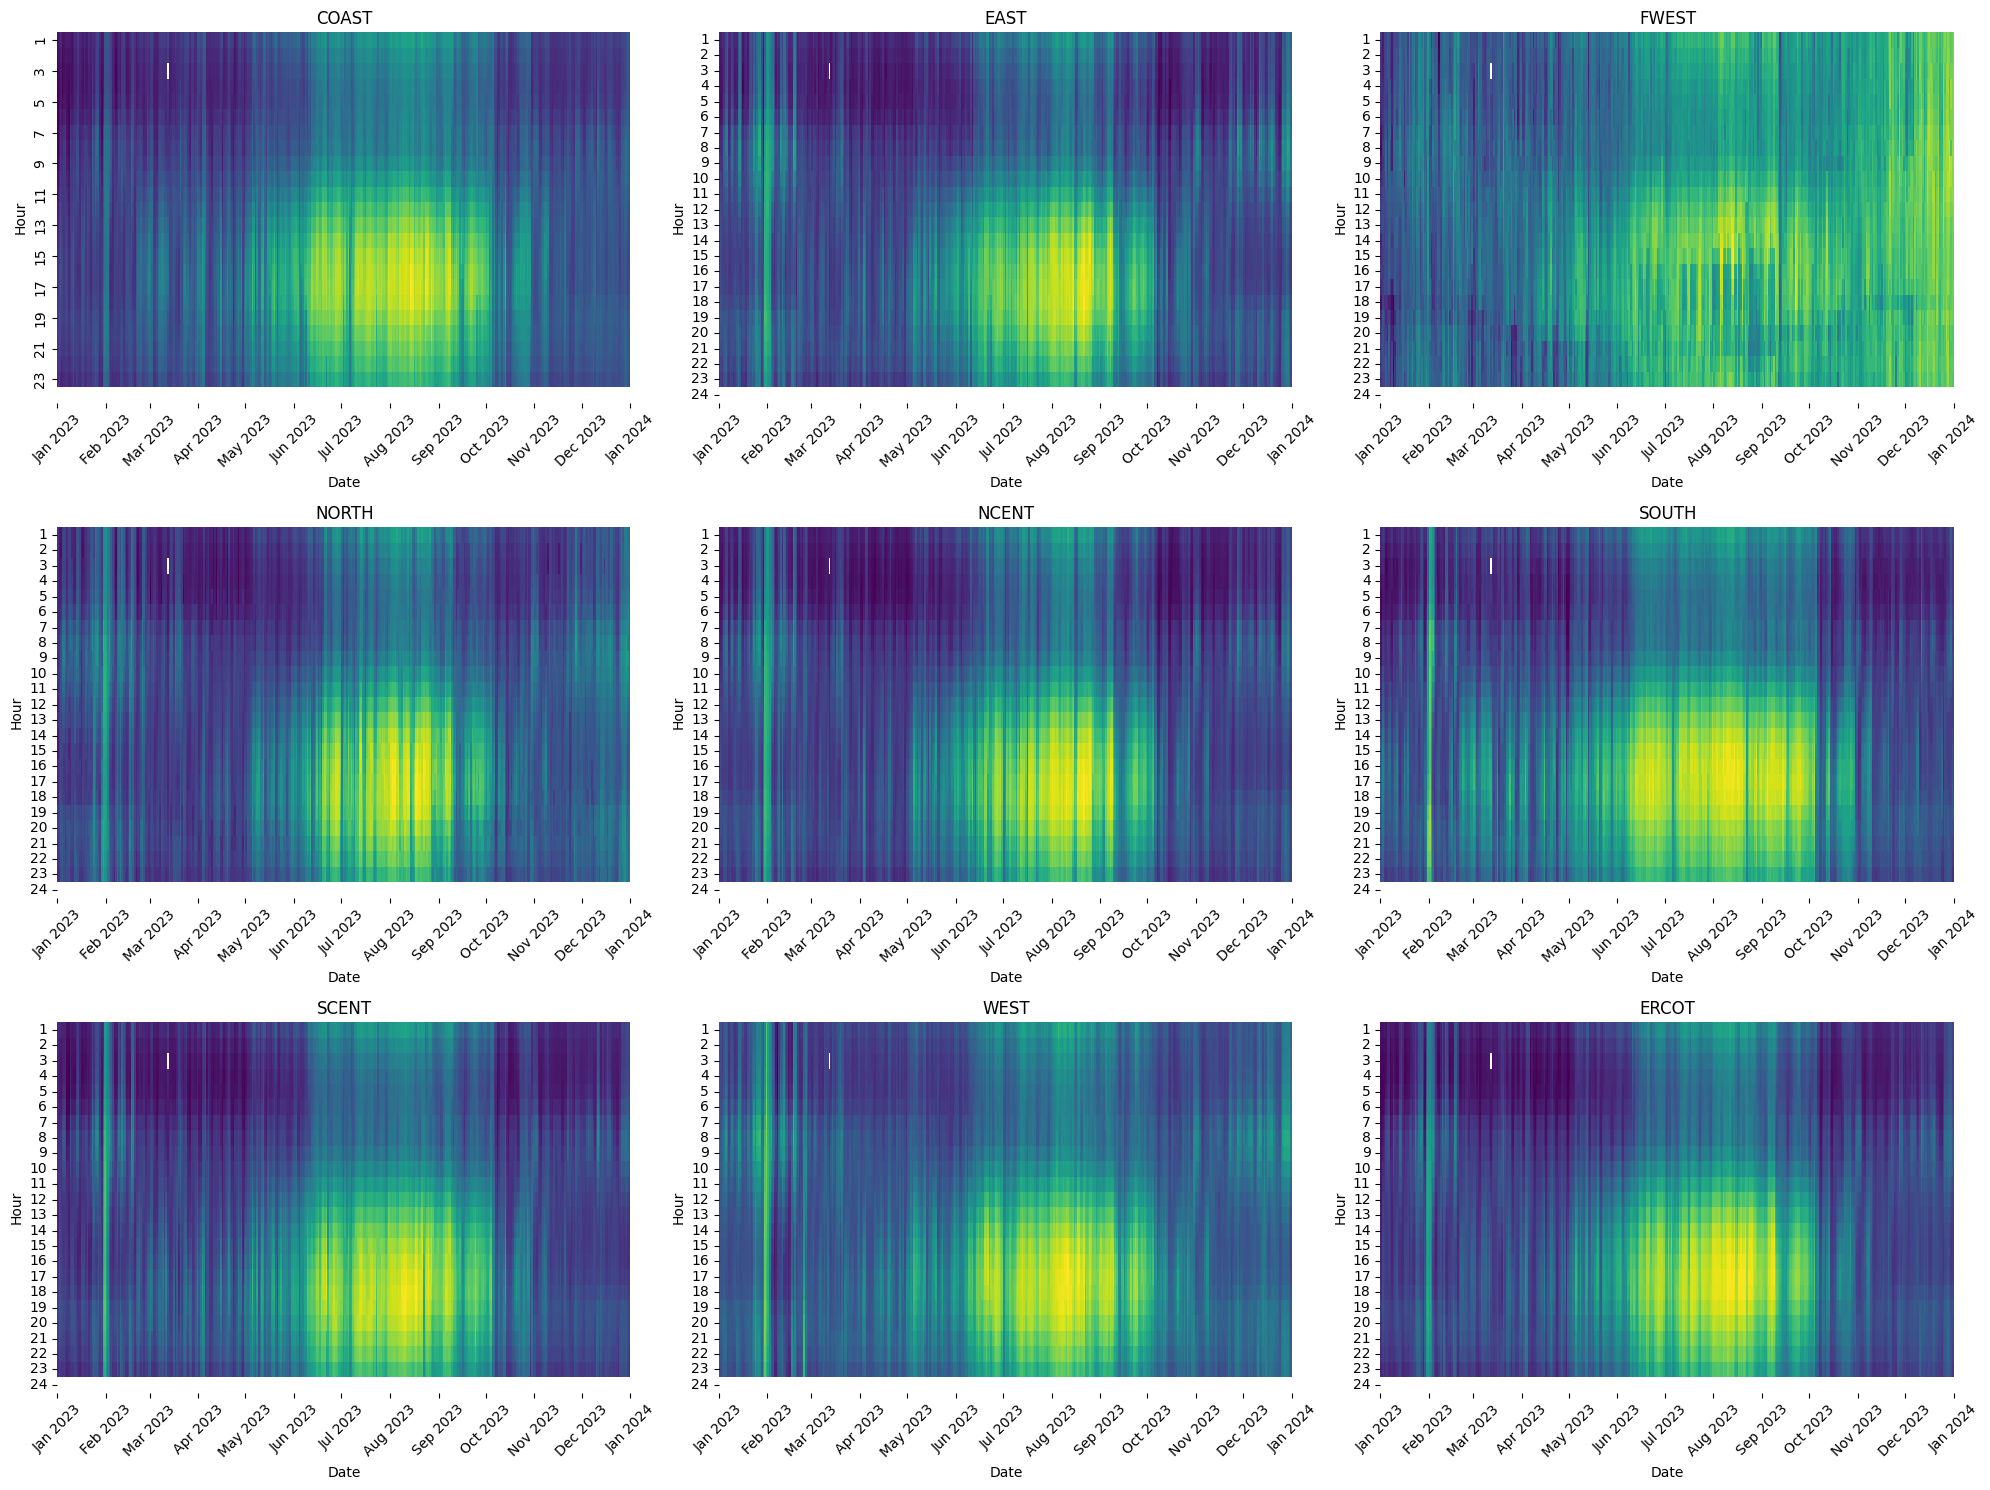

In [15]:
regions = ['COAST', 'EAST', 'FWEST', 'NORTH', 'NCENT', 'SOUTH', 'SCENT', 'WEST', 'ERCOT']

# Calculate the number of rows and columns for subplots
num_regions = len(regions)
cols = 3
rows = (num_regions // cols) + (num_regions % cols > 0)

# Set the figure size
plt.figure(figsize=(20, 5 * rows))

# Loop through each region and create a heatmap
for i, region in enumerate(regions):
    plt.subplot(rows, cols, i + 1)
    pivot_df = df.pivot_table(index='Hour', columns='Date', values=region)
    pivot_df = pivot_df.reindex(range(1, 25))
    
    # Extract the dates from the pivot table columns
    dates = pd.to_datetime(pivot_df.columns)
    
    # Find positions where the month changes
    month_positions = [0] + [i for i in range(1, len(dates)) if dates[i].month != dates[i - 1].month]
    
    # Create labels for these positions
    month_labels = [dates[i].strftime('%b %Y') for i in month_positions]
    
    # Plot the heatmap
    sns.heatmap(pivot_df, cmap='viridis', cbar=False)
    plt.title(f'{region}')
    plt.xlabel('Date')
    plt.ylabel('Hour')
    
    # Set the x-axis ticks and labels
    plt.xticks(month_positions, month_labels, rotation=45)
    plt.tight_layout()